In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "C:\\Users\\Ben Huang\\Desktop\\Google_App_Project\\googleplaystore.csv"


In [3]:
df = pd.read_csv(file)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [7]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [8]:
df['Installs']=df['Installs'].astype('int64')
df_categorized = df.groupby(['Category','Type']).sum()
df_categorized.head()

Rating   Installs
Category          Type                   
1.9               Free    19.0          0
ART_AND_DESIGN    Free   256.0  124322100
                  Paid    14.2      16000
AUTO_AND_VEHICLES Free   301.3   53080061
                  Paid     4.6      50150

Text(0,0.5,'Installs In Millions')

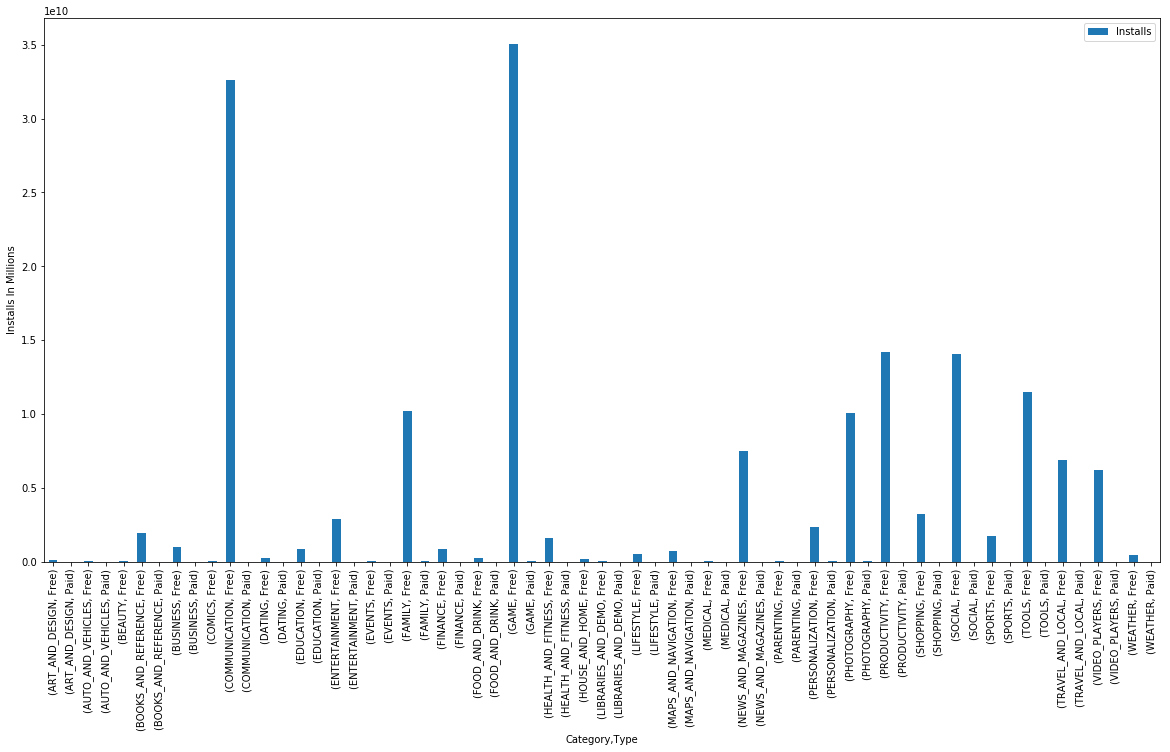

In [9]:
df_categorized_accurate = df_categorized.drop(['Rating'], axis=1)
df_categorized_accurate_2 = df_categorized_accurate.drop(['1.9'], axis = 0)
df_categorized_bar = df_categorized_accurate_2.plot.bar(figsize=(20,10))
df_categorized_bar.set_ylabel('Installs In Millions')

In [10]:
df_free = df[df.Type == 'Free']
df_free.head()
df_free_organized = df_free.groupby(['Category']).sum()
df_free_organized_true = df_free_organized.drop(['Rating'], axis=1)
df_free_organized_true_2 = df_free_organized_true.drop(['1.9'], axis = 0)
df_free_organized_true_2.head()

,Installs
Category,
ART_AND_DESIGN,124322100
AUTO_AND_VEHICLES,53080061
BEAUTY,27197050
BOOKS_AND_REFERENCE,1921446260
BUSINESS,1001502090


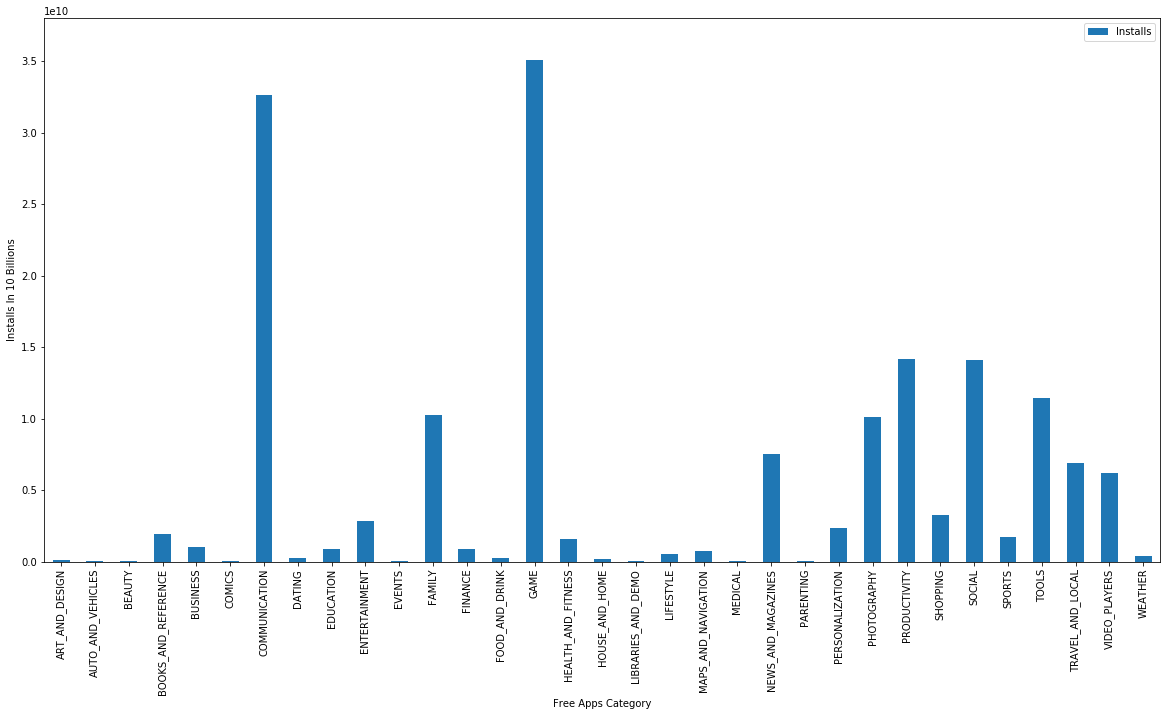

In [58]:
df_free_graph=df_free_organized_true_2.plot.bar(figsize = (20,10))
df_free_graph.set_ylabel('Installs In 10 Billions')
df_free_graph.set_xlabel('Free Apps Category')
df_free_graph.set_ylim(0,38000000000)
plt.savefig('FreeApps_Install.png', dpi=1000)

In [12]:
df_notfree = df[df.Type!='Free']
df_notfree.head()
df_notfree_organized = df_notfree.groupby(['Category']).sum()
df_notfree_organized_true = df_notfree_organized.drop(['Rating'], axis=1)

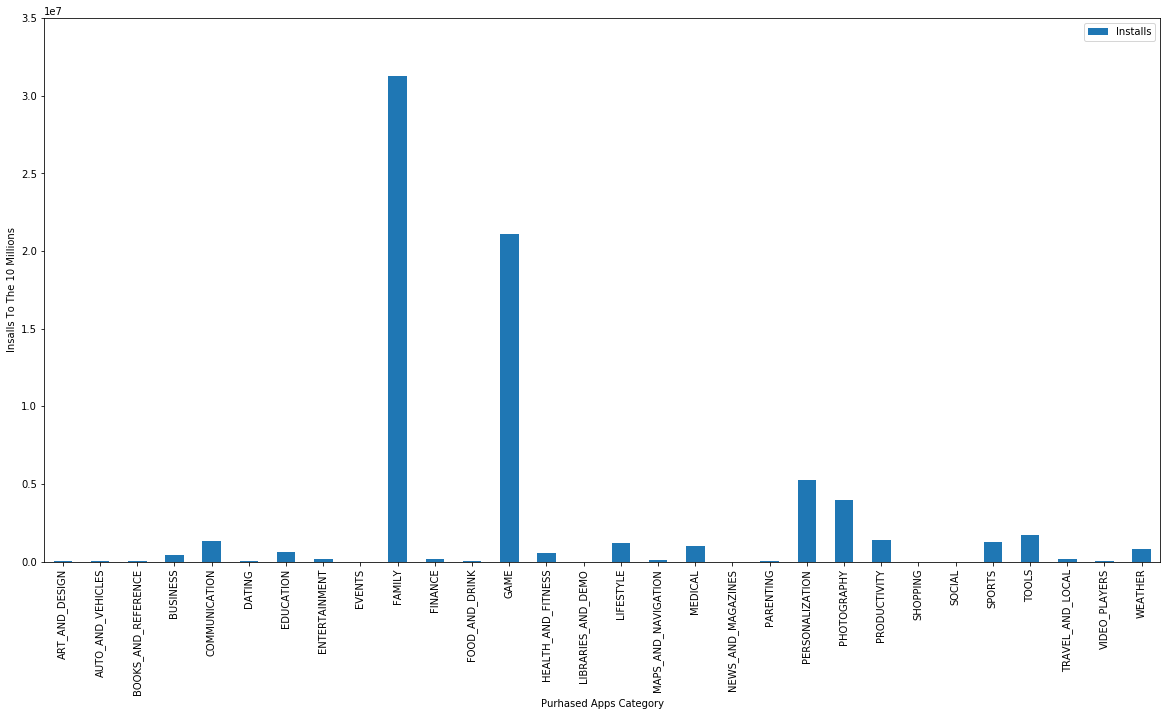

In [59]:
df_notfree_bar = df_notfree_organized_true.plot.bar(figsize = (20,10))
df_notfree_bar.set_ylim(0,35000000)
df_notfree_bar.set_ylabel('Insalls To The 10 Millions')
df_notfree_bar.set_xlabel('Purhased Apps Category')
plt.savefig('PurchasedApps_Install.png',dpi=1000)

In [14]:
df_notfree_categorized = df_notfree.groupby(['Price']).sum()
df_notfree_categorized_true = df_notfree_categorized.drop(['Rating'],axis=1)
df_notfree_categorized_true.sort_values(by=['Price'],ascending = True)
pd.DataFrame(df_notfree_categorized_true)

,Installs
Price,
$0.99,20398373
$1.00,10500
$1.04,50
$1.20,10000
$1.26,100
$1.29,1000
$1.49,293159
$1.50,1000
$1.59,10000


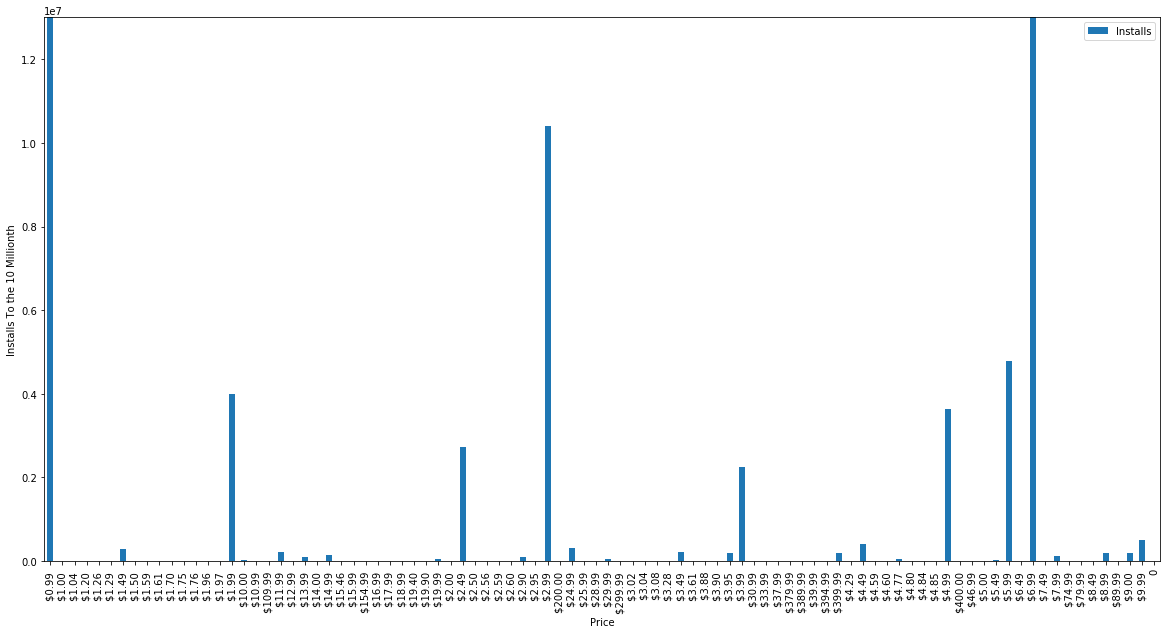

In [60]:
df_price_bar = df_notfree_categorized_true.plot.bar(figsize=(20,10))
df_price_bar.set_ylim(0,13000000)
df_price_bar.set_ylabel('Installs To the 10 Millionth')
plt.savefig('Price_To_Installs.png',dpi=1000)

In [16]:
df_size_price = df.groupby(['Size','Price']).count()
df_size_price.drop(['1,000+'],axis=0)
df_size_price.head()

App  Category  Rating  Reviews  Installs  Type  \
Size   Price                                                      
1,000+ Everyone    1         1       1        1         1     1   
1.0M   $1.49       1         1       1        1         1     1   
       $10.00      1         1       1        1         1     1   
       $3.99       1         1       1        1         1     1   
       0           4         4       1        4         4     4   

                 Content Rating  Genres  Last Updated  Current Ver  \
Size   Price                                                         
1,000+ Everyone               0       1             1            1   
1.0M   $1.49                  1       1             1            1   
       $10.00                 1       1             1            1   
       $3.99                  1       1             1            1   
       0                      4       4             4            4   

                 Android Ver  
Size   Price                  
1,000+ Everyone            0  
1.0M   $1.49               1  
       $10.00              1  
       $3.99               1  
       0                   4

In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [30]:
df_content_rating_price = df.groupby(['Rating']).sum()
df_content_rating_price.head()

,Installs
Rating,
1.0,5170
1.2,1000
1.4,7000
1.5,1105
1.6,152000


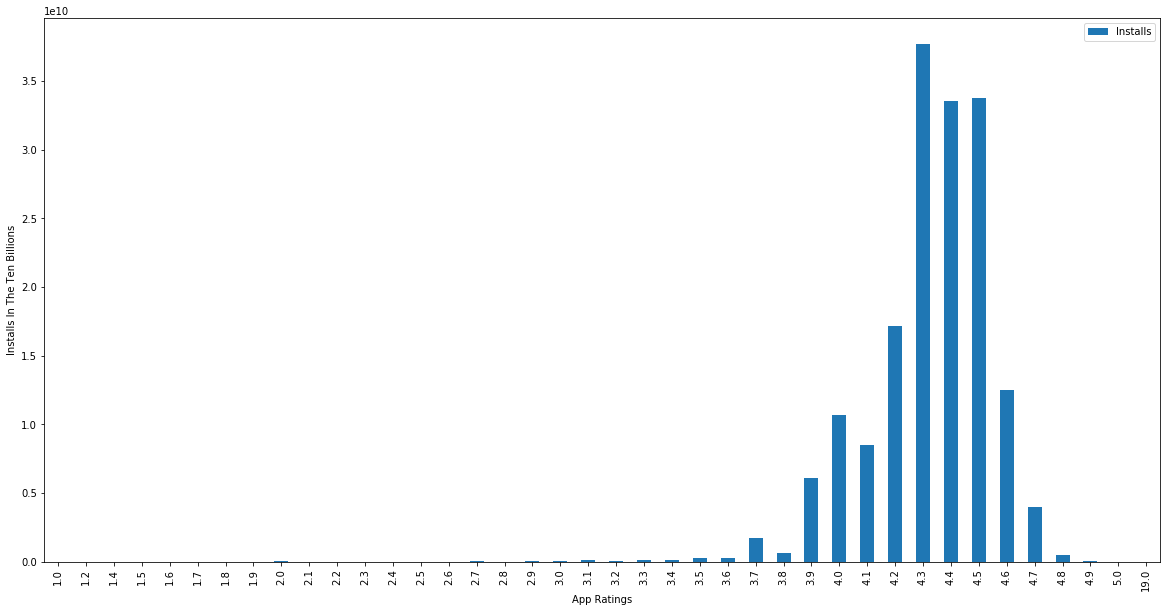

In [61]:
df_content_rating_graph = df_content_rating_price.plot.bar(figsize=(20,10))
df_content_rating_graph.set_xlabel('App Ratings')
df_content_rating_graph.set_ylabel('Installs In The Ten Billions')
plt.savefig('Rating_To_Install.png',dpi=1000)